##  Predict Pet Adoption Status Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve, roc_auc_score

In [2]:
df = pd.read_csv('C:/Users/odhia/OneDrive/Desktop/mlopsProjects/notebook/data/pet_adoption_data.csv')
df.head()

,PetID,PetType,Breed,AgeMonths,Color,Size,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner,AdoptionLikelihood
0,500,Bird,Parakeet,131,Orange,Large,5.039768,1,0,27,140,0,0
1,501,Rabbit,Rabbit,73,White,Large,16.086727,0,0,8,235,0,0
2,502,Dog,Golden Retriever,136,Orange,Medium,2.076286,0,0,85,385,0,0
3,503,Bird,Parakeet,97,White,Small,3.339423,0,0,61,217,1,0
4,504,Rabbit,Rabbit,123,Gray,Large,20.498100,0,0,28,14,1,0


In [3]:
df.drop('PetID',axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2007 entries, 0 to 2006
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PetType             2007 non-null   object 
 1   Breed               2007 non-null   object 
 2   AgeMonths           2007 non-null   int64  
 3   Color               2007 non-null   object 
 4   Size                2007 non-null   object 
 5   WeightKg            2007 non-null   float64
 6   Vaccinated          2007 non-null   int64  
 7   HealthCondition     2007 non-null   int64  
 8   TimeInShelterDays   2007 non-null   int64  
 9   AdoptionFee         2007 non-null   int64  
 10  PreviousOwner       2007 non-null   int64  
 11  AdoptionLikelihood  2007 non-null   int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 188.3+ KB


In [4]:
df.duplicated().sum()

0

In [5]:
df.describe()

,AgeMonths,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner,AdoptionLikelihood
count,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000
mean,92.279522,15.705776,0.701046,0.196313,43.974091,249.142003,0.301943,0.328351
std,52.148363,8.327749,0.457914,0.397307,25.740253,142.887040,0.459215,0.469730
min,1.000000,1.018198,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,48.000000,8.730396,0.000000,0.000000,21.000000,127.000000,0.000000,0.000000
50%,94.000000,15.925416,1.000000,0.000000,45.000000,242.000000,0.000000,0.000000
75%,138.000000,22.737180,1.000000,0.000000,66.000000,375.000000,1.000000,1.000000
max,179.000000,29.995628,1.000000,1.000000,89.000000,499.000000,1.000000,1.000000


In [6]:
df.columns = df.columns.str.lower()

## PetType: Type of pet (e.g., Dog, Cat, Bird, Rabbit).
## 
Breed: Specific breed of the pet.## 
AgeMonths: Age of the pet in months## .
Color: Color of the pe## t.
Size: Size category of the pet (Small, Medium, Larg## e).
WeightKg: Weight of the pet in kilogr## ams.
Vaccinated: Vaccination status of the pet (0 - Not vaccinated, 1 - Vaccina## ted).
HealthCondition: Health condition of the pet (0 - Healthy, 1 - Medical condi## tion).
TimeInShelterDays: Duration the pet has been in the shelter ## (days).
AdoptionFee: Adoption fee charged for the pet (in d## ollars).
PreviousOwner: Whether the pet had a previous owner (0 - No, ## 1 - Yes).
AdoptionLikelihood: Likelihood of the pet being adopted (0 - Unlikely, 1 - Likely).

In [7]:
df.columns

Index(['pettype', 'breed', 'agemonths', 'color', 'size', 'weightkg',
       'vaccinated', 'healthcondition', 'timeinshelterdays', 'adoptionfee',
       'previousowner', 'adoptionlikelihood'],
      dtype='object')

In [8]:
df.pettype.value_counts()

pettype
Dog       522
Cat       505
Rabbit    493
Bird      487
Name: count, dtype: int64

<Axes: xlabel='pettype', ylabel='count'>

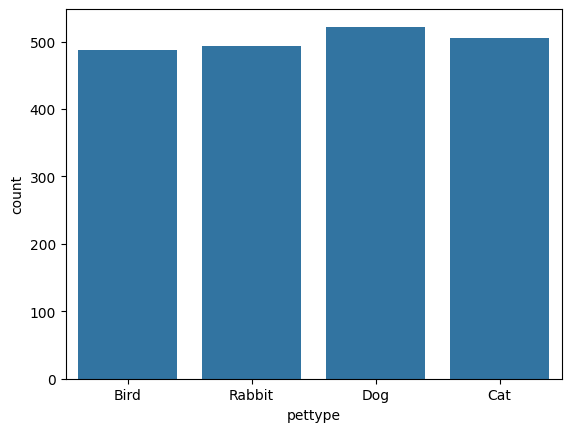

In [9]:
sns.countplot(x=df.pettype)

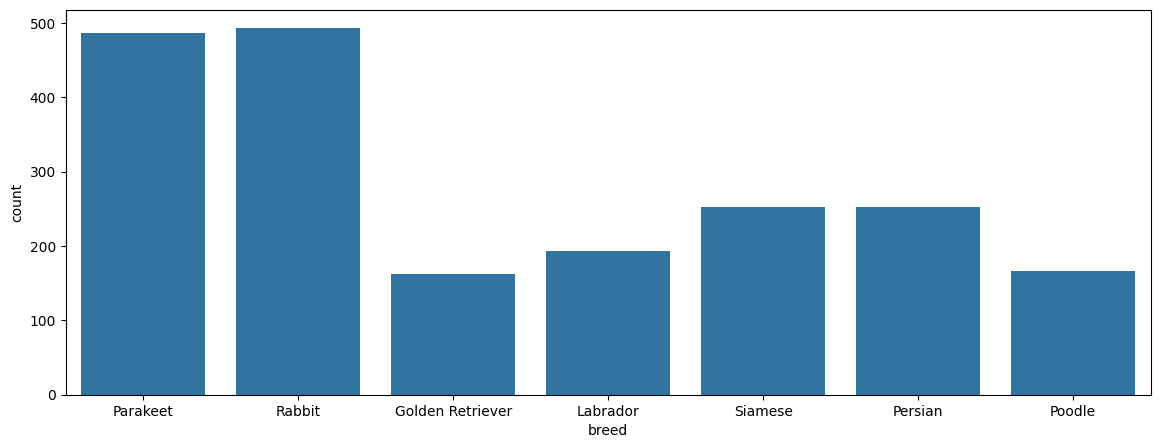

In [10]:
plt.figure(figsize=(14,5))
sns.countplot(x=df.breed)
plt.show()

<Axes: xlabel='agemonths', ylabel='Count'>

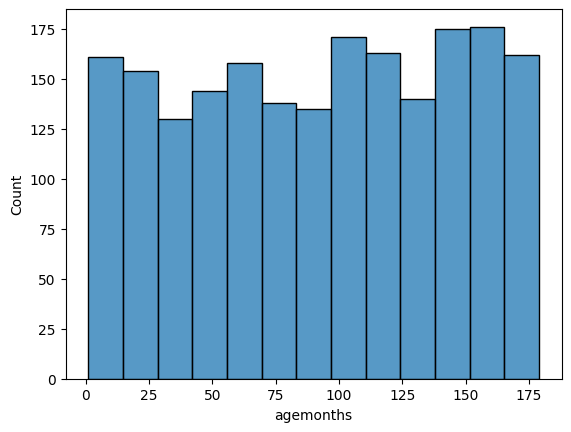

In [11]:
sns.histplot(x=df.agemonths)

In [12]:
df.color.value_counts()

color
White     420
Orange    409
Gray      400
Black     395
Brown     383
Name: count, dtype: int64

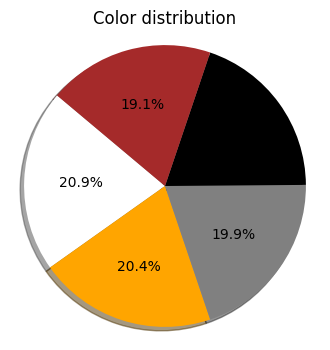

In [13]:
sizes = df.color.value_counts()
colors = ['white','orange','gray','black','brown']

plt.figure(figsize=(4,4)) 
plt.pie(sizes, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')

plt.title('Color distribution')
plt.show()

In [14]:
df['size'].value_counts()

size
Medium    714
Small     663
Large     630
Name: count, dtype: int64

<Axes: xlabel='size', ylabel='count'>

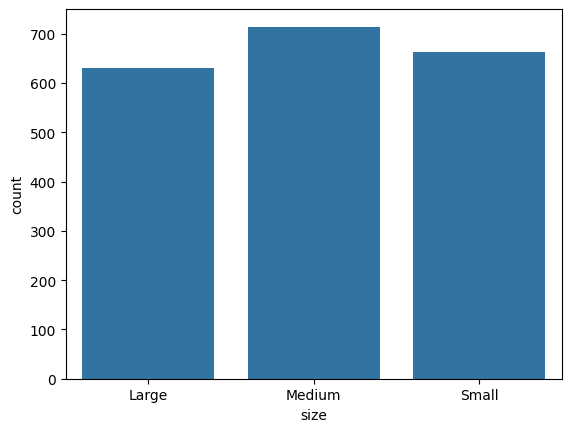

In [15]:
sns.countplot(x=df['size'])

In [16]:
df.columns

Index(['pettype', 'breed', 'agemonths', 'color', 'size', 'weightkg',
       'vaccinated', 'healthcondition', 'timeinshelterdays', 'adoptionfee',
       'previousowner', 'adoptionlikelihood'],
      dtype='object')

<Axes: xlabel='weightkg', ylabel='Density'>

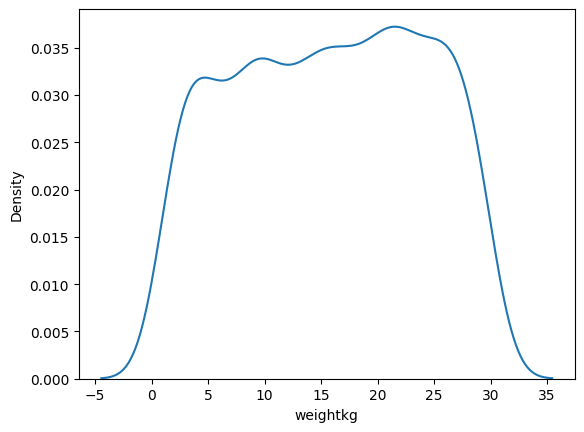

In [17]:
sns.kdeplot(x=df.weightkg)

In [18]:
df['weightkg'].min()

1.018197982225229

In [19]:
df.vaccinated.value_counts()

vaccinated
1    1407
0     600
Name: count, dtype: int64

<Axes: xlabel='vaccinated', ylabel='count'>

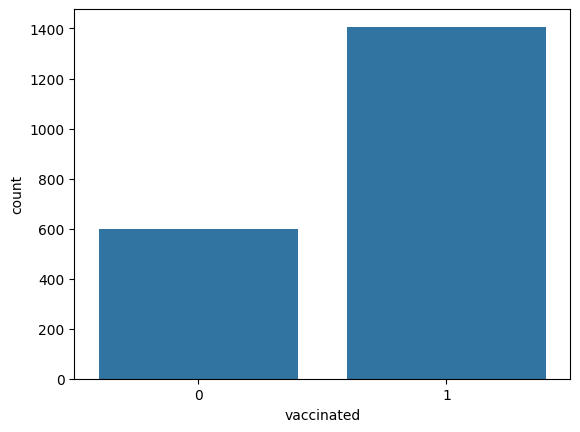

In [20]:
sns.countplot(x=df.vaccinated)

In [21]:
df.healthcondition.value_counts()

healthcondition
0    1613
1     394
Name: count, dtype: int64

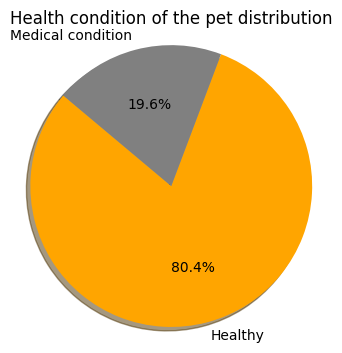

In [22]:
labels = ['Healthy','Medical condition']
sizes = df.healthcondition.value_counts()
colors = ['orange','gray']

plt.figure(figsize=(4,4)) 
plt.pie(sizes,labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')

plt.title('Health condition of the pet distribution')
plt.show()

<Axes: xlabel='timeinshelterdays', ylabel='Density'>

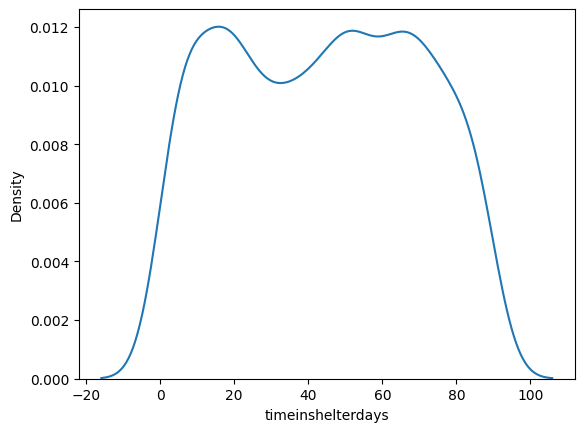

In [23]:
sns.kdeplot(x=df.timeinshelterdays)

<Axes: xlabel='adoptionfee', ylabel='Count'>

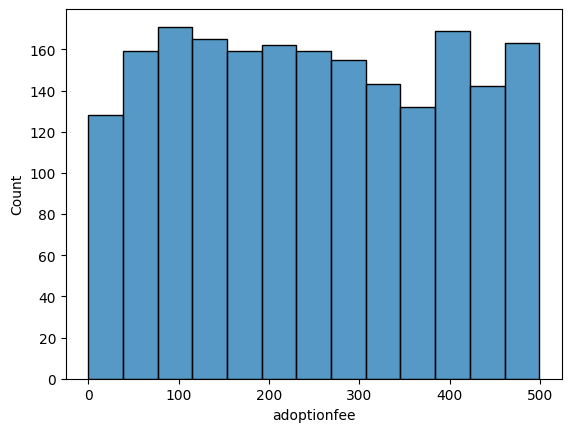

In [24]:
sns.histplot(x=df.adoptionfee)

In [25]:
df.previousowner.value_counts()

previousowner
0    1401
1     606
Name: count, dtype: int64

<Axes: xlabel='previousowner', ylabel='count'>

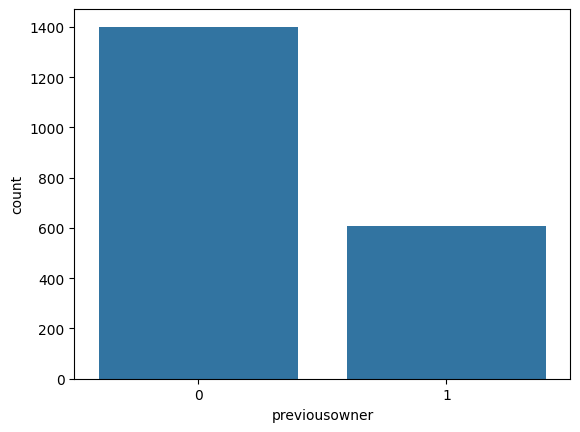

In [26]:
sns.countplot(x=df.previousowner)

In [27]:
df.adoptionlikelihood.value_counts()

adoptionlikelihood
0    1348
1     659
Name: count, dtype: int64

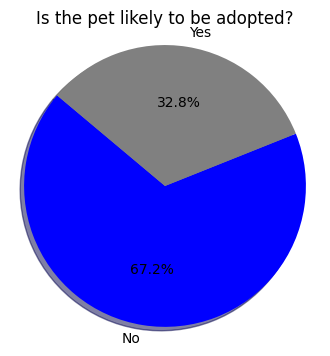

In [28]:
labels = ['No','Yes']
sizes = df.adoptionlikelihood.value_counts()
colors = ['blue','gray']

plt.figure(figsize=(4,4)) 
plt.pie(sizes,labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')

plt.title('Is the pet likely to be adopted?')
plt.show()

In [29]:
df.head()

,pettype,breed,agemonths,color,size,weightkg,vaccinated,healthcondition,timeinshelterdays,adoptionfee,previousowner,adoptionlikelihood
0,Bird,Parakeet,131,Orange,Large,5.039768,1,0,27,140,0,0
1,Rabbit,Rabbit,73,White,Large,16.086727,0,0,8,235,0,0
2,Dog,Golden Retriever,136,Orange,Medium,2.076286,0,0,85,385,0,0
3,Bird,Parakeet,97,White,Small,3.339423,0,0,61,217,1,0
4,Rabbit,Rabbit,123,Gray,Large,20.498100,0,0,28,14,1,0


<Axes: >

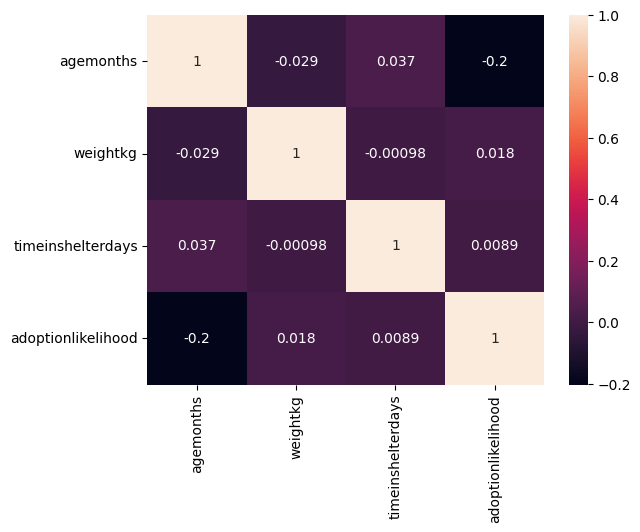

In [32]:
num_cols = ['agemonths','weightkg','timeinshelterdays','adoptionlikelihood']
df_num = df[num_cols]
sns.heatmap(df_num.corr(),annot = True)

In [33]:
df.drop('timeinshelterdays',axis=1,inplace=True)

In [34]:
df['size'] = df['size'].map({
    'Small':0,
    'Medium':1,
    'Large':2
})

In [36]:
enc_cols = ['pettype','breed','color']
sc_cols = ['agemonths','weightkg','vaccinated','healthcondition','adoptionfee','previousowner']

encoder = OneHotEncoder()
scaler = StandardScaler(with_mean=False)

enc_pipe = Pipeline(steps=[
    ('encoder',OneHotEncoder()),
    ('scaler',StandardScaler(with_mean=False))
])
sc_pipe = Pipeline(steps=[
    ('scaler',StandardScaler(with_mean=False))
])

preprocessor = ColumnTransformer([
    ('enc_pipe',enc_pipe,enc_cols),
    ('sc_pipe',sc_pipe,sc_cols)
])

In [37]:
X = df.drop('adoptionlikelihood',axis=1)
y = df.adoptionlikelihood
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [38]:
models = {
    'Logistic Regression':LogisticRegression(),
    'SVC':SVC(),
    'KNeighbours':KNeighborsClassifier(),
    'Cat Boost':CatBoostClassifier(logging_level='Silent'),
    'XGB':XGBClassifier(),
    'Decision Tree':DecisionTreeClassifier(),
    'Random Forest':RandomForestClassifier(),  
}

In [39]:
report = {}
print("Models' Report")
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train)
    prediction = model.predict(X_test)
    score = accuracy_score(y_test,prediction)
    report[list(models.keys())[i]] = score
best_score = max(sorted(list(report.values())))
for k,v in report.items():
    if v == best_score:
        best_model_name = k
        break
print(report)
print(f"{best_model_name} is the best model with accuracy of {best_score}")

Models' Report
{'Logistic Regression': 0.7330677290836654, 'SVC': 0.7549800796812749, 'KNeighbours': 0.6812749003984063, 'Cat Boost': 0.7649402390438247, 'XGB': 0.7330677290836654, 'Decision Tree': 0.7270916334661355, 'Random Forest': 0.7589641434262948}
Cat Boost is the best model with accuracy of 0.7649402390438247


In [40]:
df.head()

,pettype,breed,agemonths,color,size,weightkg,vaccinated,healthcondition,adoptionfee,previousowner,adoptionlikelihood
0,Bird,Parakeet,131,Orange,2,5.039768,1,0,140,0,0
1,Rabbit,Rabbit,73,White,2,16.086727,0,0,235,0,0
2,Dog,Golden Retriever,136,Orange,1,2.076286,0,0,385,0,0
3,Bird,Parakeet,97,White,0,3.339423,0,0,217,1,0
4,Rabbit,Rabbit,123,Gray,2,20.498100,0,0,14,1,0


In [42]:
df.columns

Index(['pettype', 'breed', 'agemonths', 'color', 'size', 'weightkg',
       'vaccinated', 'healthcondition', 'adoptionfee', 'previousowner',
       'adoptionlikelihood'],
      dtype='object')

In [41]:
df.to_csv('C:/Users/odhia/OneDrive/Desktop/mlopsProjects/notebook/data/clean_data.csv',index=False)